In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore') 
import talib as ta
import datetime
from tqdm import tqdm

In [2]:
from WindPy import w
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [3]:
import tushare as ts
ts.set_token('409d075a0cb1808e1a0ef0d015b77e580dbbce978cea08c577df4308')#设置token，只需设置一次
api = ts.pro_api()

# 调取多因子数据

In [4]:
df = pd.read_pickle('full_data.pkl')

In [5]:
df['date'] = df.reset_index()['index'].apply(lambda x:x.strftime('%Y%m%d')).tolist()

In [6]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110
...,...,...,...,...,...,...,...
2020-11-18,40.121746,40.334782,39.624663,40.192758,1.323015,600405.SH,20201118
2020-11-19,39.908710,40.618830,39.908710,40.263770,1.365033,600405.SH,20201119
2020-11-20,40.263770,42.181092,39.979722,41.399961,5.013187,600405.SH,20201120
2020-11-23,41.328949,41.897045,40.973889,41.399961,3.427870,600405.SH,20201123


In [7]:
df = df[(df.date<'2019-01-01')]     # (df.date>='2009-01-01') & 

In [8]:
df.head()

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110


# 获得沪深300成分股和权重

In [9]:
# 上证50指数：000016.SH

In [17]:
wsetdata=w.wset("IndexConstituent","date=20201124;windcode=000985.SH;field=date,wind_code,i_weight",usedf=True)

In [18]:
wsetdata[1]

,date,wind_code,i_weight
1,2020-10-30,000001.SZ,0.555
2,2020-10-30,000002.SZ,0.604
3,2020-10-30,000004.SZ,0.006
4,2020-10-30,000005.SZ,0.007
5,2020-10-30,000006.SZ,0.017
...,...,...,...
3399,2020-10-30,603993.SH,0.090
3400,2020-10-30,603995.SH,0.006
3401,2020-10-30,603997.SH,0.004
3402,2020-10-30,603998.SH,0.005


In [12]:
# zz500_lis = wsetdata[1].wind_code.tolist()

In [19]:
hs300_lis = wsetdata[1].wind_code.tolist()

In [20]:
# sz50_lis = wsetdata[1].wind_code.tolist()

In [21]:
# zz500 = w.wset("IndexConstituent","date=20201124;windcode=000905.SH;field=date,wind_code,i_weight",usedf=True)

In [22]:
# zz = zz500[1]['wind_code'].tolist()

In [23]:
df = df[df.s.isin(hs300_lis)]

In [24]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110
...,...,...,...,...,...,...,...
2018-12-24,30.535134,30.819182,30.180074,30.464122,0.539497,600405.SH,20181224
2018-12-25,30.109063,30.180074,28.191740,29.825015,1.166357,600405.SH,20181225
2018-12-26,29.327931,30.677158,29.327931,29.967039,0.743282,600405.SH,20181226
2018-12-27,30.393110,31.174242,29.754003,29.825015,1.055254,600405.SH,20181227


## 提取反转因子

In [25]:
close = df[['s','CLOSE']]

In [26]:
close = close.rename(columns={'s':'TICKER_SYMBOL','CLOSE':'close'})

In [27]:
tbzl = close.reset_index().groupby(['TICKER_SYMBOL','index'])[['close']].mean()

In [28]:
tbzl

close
TICKER_SYMBOL index                 
000001.SZ     2005-01-04  163.100160
              2005-01-05  161.599239
              2005-01-06  163.100160
              2005-01-07  162.850007
              2005-01-10  164.851236
...                              ...
603999.SH     2018-12-24   12.445538
              2018-12-25   12.007143
              2018-12-26   12.080209
              2018-12-27   11.763591
              2018-12-28   11.787946

[9692298 rows x 1 columns]

In [29]:
yu = 0.09

In [30]:
tbzl['ret'] = tbzl.groupby('TICKER_SYMBOL')['close'].pct_change()

In [31]:
tbzl['sig'] = np.where(tbzl['ret']>yu,1,np.nan)
tbzl['sig'] = np.where(tbzl['ret']<yu*-1,-1,tbzl['sig'])
tbzl['sig'].fillna(0,inplace=True)

In [32]:
zhangting = tbzl[tbzl['sig']==1]
dieting = tbzl[tbzl['sig']==-1]

In [33]:
tbzl

close       ret  sig
TICKER_SYMBOL index                                
000001.SZ     2005-01-04  163.100160       NaN  0.0
              2005-01-05  161.599239 -0.009202  0.0
              2005-01-06  163.100160  0.009288  0.0
              2005-01-07  162.850007 -0.001534  0.0
              2005-01-10  164.851236  0.012289  0.0
...                              ...       ...  ...
603999.SH     2018-12-24   12.445538 -0.005837  0.0
              2018-12-25   12.007143 -0.035225  0.0
              2018-12-26   12.080209  0.006085  0.0
              2018-12-27   11.763591 -0.026210  0.0
              2018-12-28   11.787946  0.002070  0.0

[9692298 rows x 3 columns]

# 推波助澜比率（一）

In [34]:
tbzl_ratio_1 = zhangting.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size() - dieting.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size()

In [35]:
tbzl_ratio_1 

index
2005-01-04         NaN
2005-01-05    0.003510
2005-01-06         NaN
2005-01-07    0.001053
2005-01-10    0.000702
                ...   
2018-12-24    0.003510
2018-12-25    0.007722
2018-12-26    0.009477
2018-12-27    0.000702
2018-12-28    0.002457
Name: sig, Length: 3402, dtype: float64

# 计算推波助澜比率（二）

In [36]:
tbzl_ratio_2 = pd.DataFrame(tbzl_ratio_1).dropna()

In [37]:
tbzl_ratio_2['ama30'] = tbzl_ratio_2['sig'].rolling(30).mean()
tbzl_ratio_2['ama100'] = tbzl_ratio_2['sig'].rolling(100,min_periods = 50).mean()

In [38]:
tbzl_ratio_2.dropna(inplace=True)

In [39]:
tbzl_ratio_2['ratio'] = tbzl_ratio_2['ama30']/tbzl_ratio_2['ama100']

In [40]:
tbzl_ratio_2['buy'] = np.where((tbzl_ratio_2['ratio']>1.15)&(tbzl_ratio_2['ama30']>0)&(tbzl_ratio_2['ama100']>0),1,np.nan)
tbzl_ratio_2['buy'] = np.where((tbzl_ratio_2['ama30']<0)|(tbzl_ratio_2['ama100']<0),0,tbzl_ratio_2['buy'])
tbzl_ratio_2['buy'].ffill(inplace=True)

In [41]:
tbzl['lian_zhang_sig'] = np.where(tbzl['ret']>yu,1,0)
tbzl['lian_die_sig'] = np.where(tbzl['ret']<yu*-1,-1,0)

del tbzl['lianxu'] 

In [42]:
y = tbzl['lian_zhang_sig']
tbzl['lianxu_zhang'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
y = tbzl['lian_die_sig']
tbzl['lianxu_die'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)

In [43]:
lianxuzhang = tbzl[tbzl.lianxu_zhang >0]
lianxudie = tbzl[tbzl.lianxu_die <0]

In [44]:
lianxuzhang.groupby('index')['sig'].size()

index
2005-01-05    12
2005-01-07     4
2005-01-10     3
2005-01-11     2
2005-01-12     2
              ..
2018-12-24    15
2018-12-25    29
2018-12-26    30
2018-12-27    14
2018-12-28    11
Name: sig, Length: 3384, dtype: int64

In [45]:
lianxudie.groupby('index')['sig'].size()

index
2005-01-05     2
2005-01-06     4
2005-01-07     1
2005-01-10     1
2005-01-11     1
              ..
2018-12-24     5
2018-12-25     7
2018-12-26     3
2018-12-27    12
2018-12-28     4
Name: sig, Length: 2220, dtype: int64

In [46]:
tbzl_ratio_2

,sig,ama30,ama100,ratio,buy
index,,,,,
2005-04-27,-0.011934,-0.002562,-0.001467,1.746411,0.0
2005-04-28,0.005967,-0.002410,-0.001321,1.823958,0.0
2005-04-29,-0.002808,-0.002516,-0.001350,1.863333,0.0
2005-05-09,-0.027378,-0.003463,-0.001841,1.881055,0.0
2005-05-10,0.000351,-0.003452,-0.001801,1.916968,0.0
...,...,...,...,...,...
2018-12-24,0.003510,0.007406,0.001074,6.895425,1.0
2018-12-25,0.007722,0.006786,0.001088,6.236559,1.0
2018-12-26,0.009477,0.006248,0.001225,5.100287,1.0


# 推波助澜（二）求连续涨跌停信号

In [47]:
tbzl_ratio_lianxu_bianhua = lianxuzhang.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size() - lianxudie.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size()

In [48]:
tbzl_ratio_lianxu_bianhua 

index
2005-01-04         NaN
2005-01-05    0.003510
2005-01-06         NaN
2005-01-07    0.001053
2005-01-10    0.000702
                ...   
2018-12-24    0.003510
2018-12-25    0.007722
2018-12-26    0.009477
2018-12-27    0.000702
2018-12-28    0.002457
Name: sig, Length: 3402, dtype: float64

In [49]:
lianxu_bianhua  = pd.DataFrame(tbzl_ratio_lianxu_bianhua).dropna()
lianxu_bianhua.columns = ['ra']

In [50]:
lianxu_bianhua['ama30'] = lianxu_bianhua['ra'].rolling(30).mean()
lianxu_bianhua['ama100'] = lianxu_bianhua['ra'].rolling(100,min_periods = 50).mean()
lianxu_bianhua.dropna(inplace=True)
lianxu_bianhua['ratio'] = lianxu_bianhua['ama30']/lianxu_bianhua['ama100']

In [51]:
lianxu_bianhua

,ra,ama30,ama100,ratio
index,,,,
2005-04-27,-0.011934,-0.002562,-0.001467,1.746411
2005-04-28,0.005967,-0.002410,-0.001321,1.823958
2005-04-29,-0.002808,-0.002516,-0.001350,1.863333
2005-05-09,-0.027378,-0.003463,-0.001841,1.881055
2005-05-10,0.000351,-0.003452,-0.001801,1.916968
...,...,...,...,...
2018-12-24,0.003510,0.007406,0.001074,6.895425
2018-12-25,0.007722,0.006786,0.001088,6.236559
2018-12-26,0.009477,0.006248,0.001225,5.100287


In [52]:
lianxu_bianhua['buy'] = np.where((lianxu_bianhua['ratio']>1.15)&(lianxu_bianhua['ama30']>0)&(lianxu_bianhua['ama100']>0),1,np.nan)
lianxu_bianhua['buy'] = np.where((lianxu_bianhua['ama30']<0)|(lianxu_bianhua['ama100']<0),0,lianxu_bianhua['buy'])
lianxu_bianhua['buy'].ffill(inplace=True)

In [53]:
lianxu_bianhua

,ra,ama30,ama100,ratio,buy
index,,,,,
2005-04-27,-0.011934,-0.002562,-0.001467,1.746411,0.0
2005-04-28,0.005967,-0.002410,-0.001321,1.823958,0.0
2005-04-29,-0.002808,-0.002516,-0.001350,1.863333,0.0
2005-05-09,-0.027378,-0.003463,-0.001841,1.881055,0.0
2005-05-10,0.000351,-0.003452,-0.001801,1.916968,0.0
...,...,...,...,...,...
2018-12-24,0.003510,0.007406,0.001074,6.895425,1.0
2018-12-25,0.007722,0.006786,0.001088,6.236559,1.0
2018-12-26,0.009477,0.006248,0.001225,5.100287,1.0


# 导入high和low，计算地天板和天地板

In [54]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110
...,...,...,...,...,...,...,...
2018-12-24,30.535134,30.819182,30.180074,30.464122,0.539497,600405.SH,20181224
2018-12-25,30.109063,30.180074,28.191740,29.825015,1.166357,600405.SH,20181225
2018-12-26,29.327931,30.677158,29.327931,29.967039,0.743282,600405.SH,20181226
2018-12-27,30.393110,31.174242,29.754003,29.825015,1.055254,600405.SH,20181227


In [55]:
high = df[['s','HIGH']]
high = high.rename(columns={'s':'TICKER_SYMBOL','HIGH':'high'})
low = df[['s','LOW']]
low = low.rename(columns={'s':'TICKER_SYMBOL','LOW':'low'})

In [56]:
high

,TICKER_SYMBOL,high
2005-01-04,600546.SH,7.978139
2005-01-05,600546.SH,8.079128
2005-01-06,600546.SH,7.715567
2005-01-07,600546.SH,7.513589
2005-01-10,600546.SH,7.473193
...,...,...
2018-12-24,600405.SH,30.819182
2018-12-25,600405.SH,30.180074
2018-12-26,600405.SH,30.677158
2018-12-27,600405.SH,31.174242


In [57]:
close

,TICKER_SYMBOL,close
2005-01-04,600546.SH,7.877150
2005-01-05,600546.SH,7.685271
2005-01-06,600546.SH,7.372204
2005-01-07,600546.SH,7.412600
2005-01-10,600546.SH,7.442897
...,...,...
2018-12-24,600405.SH,30.464122
2018-12-25,600405.SH,29.825015
2018-12-26,600405.SH,29.967039
2018-12-27,600405.SH,29.825015


In [58]:
datas = df.copy()

In [59]:
rely = ['index','TICKER_SYMBOL']

In [60]:
df = df.rename(columns={'HIGH':'high','CLOSE':'close','LOW':'low','s':'TICKER_SYMBOL'})

In [61]:
df = df.reset_index().rename(columns={'index':'TRADE_DATE'})

In [62]:
# df = df.iloc[:,1:]

In [63]:
miu = 0.06

In [64]:
df['close_yes'] = df['close'].shift(1)

In [65]:
df = df.dropna()

In [66]:
df['tian_di_ban'] = np.where((df['high']/df['close_yes']>(1+miu))&(df['close_yes']/df['close'] > (1+miu)),1,0)

In [67]:
df['di_tian_ban'] = np.where((df['close_yes']/df['low']>(1+miu))&(df['close']/df['close_yes'] > (1+miu)),1,0)

In [68]:
tian_di_ban = df[df['tian_di_ban'] == 1]
di_tian_ban = df[df['di_tian_ban'] == 1]

In [69]:
df

,TRADE_DATE,OPEN,high,low,close,TURN,TICKER_SYMBOL,date,close_yes,tian_di_ban,di_tian_ban
1,2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105,7.877150,0,0
2,2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106,7.685271,0,0
3,2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107,7.372204,0,0
4,2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110,7.412600,0,0
5,2005-01-11,7.483292,7.483292,7.432798,7.483292,0.454390,600546.SH,20050111,7.442897,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9692293,2018-12-24,30.535134,30.819182,30.180074,30.464122,0.539497,600405.SH,20181224,30.464122,0,0
9692294,2018-12-25,30.109063,30.180074,28.191740,29.825015,1.166357,600405.SH,20181225,30.464122,0,0
9692295,2018-12-26,29.327931,30.677158,29.327931,29.967039,0.743282,600405.SH,20181226,29.825015,0,0
9692296,2018-12-27,30.393110,31.174242,29.754003,29.825015,1.055254,600405.SH,20181227,29.967039,0,0


In [70]:
tbzl_ratio_tiandi_ditian = df.groupby('TRADE_DATE')['di_tian_ban'].sum()/tbzl.groupby('index')['sig'].size() - df.groupby('TRADE_DATE')['tian_di_ban'].sum()/tbzl.groupby('index')['sig'].size()

In [71]:
tbzl_ratio_tiandi_ditian 

TRADE_DATE
2005-01-04    0.000000
2005-01-05    0.000000
2005-01-06    0.000000
2005-01-07    0.000351
2005-01-10    0.000000
                ...   
2018-12-24    0.000000
2018-12-25    0.000000
2018-12-26   -0.000702
2018-12-27    0.000000
2018-12-28    0.000000
Length: 3402, dtype: float64

In [72]:
ditian_tiandi = pd.DataFrame(tbzl_ratio_tiandi_ditian,columns=['ra']).dropna()
ditian_tiandi

,ra
TRADE_DATE,
2005-01-04,0.000000
2005-01-05,0.000000
2005-01-06,0.000000
2005-01-07,0.000351
2005-01-10,0.000000
...,...
2018-12-24,0.000000
2018-12-25,0.000000
2018-12-26,-0.000702


In [73]:
ditian_tiandi['ama30'] = ditian_tiandi['ra'].rolling(30).mean()
ditian_tiandi['ama100'] = ditian_tiandi['ra'].rolling(100,min_periods = 50).mean()
ditian_tiandi.dropna(inplace=True)
ditian_tiandi['ratio'] = ditian_tiandi['ama30']/ditian_tiandi['ama100']

In [74]:
ditian_tiandi

,ra,ama30,ama100,ratio
TRADE_DATE,,,,
2005-03-23,0.000351,0.000035,0.000028,1.250000
2005-03-24,0.000000,0.000035,0.000028,1.275000
2005-03-25,0.000000,0.000023,0.000027,0.866667
2005-03-28,0.000000,0.000023,0.000026,0.883333
2005-03-29,0.000000,0.000023,0.000026,0.900000
...,...,...,...,...
2018-12-24,0.000000,-0.000082,0.000021,-3.888889
2018-12-25,0.000000,-0.000082,0.000021,-3.888889
2018-12-26,-0.000702,-0.000094,0.000007,-13.333333


In [75]:
ditian_tiandi['buy'] = np.where((ditian_tiandi['ratio']>1.15)&(ditian_tiandi['ama30']>0)&(ditian_tiandi['ama100']>0),1,np.nan)
ditian_tiandi['buy'] = np.where((ditian_tiandi['ama30']<0)|(ditian_tiandi['ama100']<0),0,ditian_tiandi['buy'])
ditian_tiandi['buy'].ffill(inplace=True)

In [76]:
ditian_tiandi

,ra,ama30,ama100,ratio,buy
TRADE_DATE,,,,,
2005-03-23,0.000351,0.000035,0.000028,1.250000,1.0
2005-03-24,0.000000,0.000035,0.000028,1.275000,1.0
2005-03-25,0.000000,0.000023,0.000027,0.866667,1.0
2005-03-28,0.000000,0.000023,0.000026,0.883333,1.0
2005-03-29,0.000000,0.000023,0.000026,0.900000,1.0
...,...,...,...,...,...
2018-12-24,0.000000,-0.000082,0.000021,-3.888889,0.0
2018-12-25,0.000000,-0.000082,0.000021,-3.888889,0.0
2018-12-26,-0.000702,-0.000094,0.000007,-13.333333,0.0


# 结合三者信号，看收益表现

In [77]:
tb = tbzl_ratio_2.reset_index().rename(columns={'index':'TRADE_DATE'})

In [78]:
total = pd.merge(pd.merge(tb,ditian_tiandi.reset_index(),on='TRADE_DATE'),ditian_tiandi.reset_index(),on='TRADE_DATE')

In [79]:
total['total_buy'] = total['buy_x'] + total['buy_y'] + total['buy']

In [80]:
bzh = lambda x:(x-x.min())/(x.max()-x.min())

In [81]:
total['r1'] = total['ra_x']

In [82]:
total['r2'] = total['ra_y']

In [83]:
total['r3'] = total['r1'] + total['r2']

In [148]:
total

,TRADE_DATE,sig,ama30_x,ama100_x,ratio_x,buy_x,ra_x,ama30_y,ama100_y,ratio_y,buy_y,ra_y,ama30,ama100,ratio,buy,total_buy,r1,r2,r3
0,2005-04-27,-0.011934,-0.002562,-0.001467,1.746411,0.0,0.000000,0.000059,0.000033,1.785714,1.0,0.000000,0.000059,0.000033,1.785714,1.0,2.0,0.000000,0.000000,0.000000
1,2005-04-28,0.005967,-0.002410,-0.001321,1.823958,0.0,0.001404,0.000105,0.000051,2.072727,1.0,0.001404,0.000105,0.000051,2.072727,1.0,2.0,0.001404,0.001404,0.002808
2,2005-04-29,-0.002808,-0.002516,-0.001350,1.863333,0.0,0.000000,0.000094,0.000050,1.866667,1.0,0.000000,0.000094,0.000050,1.866667,1.0,2.0,0.000000,0.000000,0.000000
3,2005-05-09,-0.027378,-0.003463,-0.001841,1.881055,0.0,0.000000,0.000094,0.000050,1.890909,1.0,0.000000,0.000094,0.000050,1.890909,1.0,2.0,0.000000,0.000000,0.000000
4,2005-05-10,0.000351,-0.003452,-0.001801,1.916968,0.0,0.000000,0.000094,0.000049,1.915152,1.0,0.000000,0.000094,0.000049,1.915152,1.0,2.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,2018-12-24,0.003510,0.007406,0.001074,6.895425,1.0,0.000000,-0.000082,0.000021,-3.888889,0.0,0.000000,-0.000082,0.000021,-3.888889,0.0,1.0,0.000000,0.000000,0.000000
2154,2018-12-25,0.007722,0.006786,0.001088,6.236559,1.0,0.000000,-0.000082,0.000021,-3.888889,0.0,0.000000,-0.000082,0.000021,-3.888889,0.0,1.0,0.000000,0.000000,0.000000
2155,2018-12-26,0.009477,0.006248,0.001225,5.100287,1.0,-0.000702,-0.000094,0.000007,-13.333333,0.0,-0.000702,-0.000094,0.000007,-13.333333,0.0,1.0,-0.000702,-0.000702,-0.001404
2156,2018-12-27,0.000702,0.005803,0.001183,4.906034,1.0,0.000000,-0.000094,0.000007,-13.333333,0.0,0.000000,-0.000094,0.000007,-13.333333,0.0,1.0,0.000000,0.000000,0.000000


In [107]:
def get_hs300(start,end):
    return ts.pro_bar(ts_code='000985.SH',asset='I',\
               adj='qfq', start_date=start, end_date=end) 

In [241]:
total.head()

,TRADE_DATE,sig,ama30_x,ama100_x,ratio_x,buy_x,ra_x,ama30_y,ama100_y,ratio_y,buy_y,ra_y,ama30,ama100,ratio,buy,total_buy,r1,r2,r3
0,2005-04-27,-0.011934,-0.002562,-0.001467,1.746411,0.0,0.000000,0.000059,0.000033,1.785714,1.0,0.000000,0.000059,0.000033,1.785714,1.0,2.0,0.000000,0.000000,0.000000
1,2005-04-28,0.005967,-0.002410,-0.001321,1.823958,0.0,0.001404,0.000105,0.000051,2.072727,1.0,0.001404,0.000105,0.000051,2.072727,1.0,2.0,0.001404,0.001404,0.002808
2,2005-04-29,-0.002808,-0.002516,-0.001350,1.863333,0.0,0.000000,0.000094,0.000050,1.866667,1.0,0.000000,0.000094,0.000050,1.866667,1.0,2.0,0.000000,0.000000,0.000000
3,2005-05-09,-0.027378,-0.003463,-0.001841,1.881055,0.0,0.000000,0.000094,0.000050,1.890909,1.0,0.000000,0.000094,0.000050,1.890909,1.0,2.0,0.000000,0.000000,0.000000
4,2005-05-10,0.000351,-0.003452,-0.001801,1.916968,0.0,0.000000,0.000094,0.000049,1.915152,1.0,0.000000,0.000094,0.000049,1.915152,1.0,2.0,0.000000,0.000000,0.000000


In [242]:
b = get_hs300('2009-01-01','2018-12-31')

In [243]:
b['date'] = b['trade_date'].apply(lambda x:x[:4]+'-'+x[4:6]+'-'+x[6:])

In [244]:
b = b.sort_values(by='date')

In [245]:
b.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,date
2430,000985.SH,20090105,1907.525,1868.013,1907.525,1863.720,1838.316,69.209,3.7648,9.516144e+07,6.807124e+07,2009-01-05
2429,000985.SH,20090106,1968.611,1904.877,1972.399,1904.877,1907.525,61.086,3.2024,1.401253e+08,1.014968e+08,2009-01-06
2428,000985.SH,20090107,1963.841,1968.448,1982.775,1961.501,1968.611,-4.770,-0.2423,1.302260e+08,9.371988e+07,2009-01-07
2427,000985.SH,20090108,1919.178,1928.242,1936.145,1908.991,1963.841,-44.663,-2.2743,1.130788e+08,8.391167e+07,2009-01-08
2426,000985.SH,20090109,1957.018,1917.611,1958.116,1917.611,1919.178,37.840,1.9717,1.049193e+08,7.852212e+07,2009-01-09


In [388]:
bench = b[['date','pct_chg']]

In [389]:
bench['pct_chg'] = bench['pct_chg']/100

In [390]:
bench.dtypes

date        object
pct_chg    float64
dtype: object

In [391]:
bench.dtypes

date        object
pct_chg    float64
dtype: object

In [392]:
strategy = total[['TRADE_DATE','total_buy','r1','r2']]
# strategy.columns = ['date','sig']

In [393]:
strategy['date'] = strategy['TRADE_DATE'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [394]:
# bench['date'] = bench['date'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [395]:
bench = pd.merge(bench,strategy,on='date')

In [396]:
bench = bench.dropna()

In [397]:
# bench = bench.sort_values(by='date')

In [398]:
bench['buy'] = np.where(bench['total_buy']>0,-1.5,0.1)

## 考虑交易成本

In [399]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy
0,2009-01-05,0.037648,2009-01-05,2.0,0.000351,0.000351,-1.5
1,2009-01-08,-0.022743,2009-01-08,2.0,0.000000,0.000000,-1.5
2,2009-01-13,-0.024385,2009-01-13,2.0,0.000000,0.000000,-1.5
3,2009-01-14,0.040883,2009-01-14,2.0,0.000000,0.000000,-1.5
4,2009-01-19,0.007226,2009-01-19,2.0,0.000000,0.000000,-1.5
...,...,...,...,...,...,...,...
1608,2018-12-24,0.005969,2018-12-24,1.0,0.000000,0.000000,-1.5
1609,2018-12-25,-0.008709,2018-12-25,1.0,0.000000,0.000000,-1.5
1610,2018-12-26,-0.003987,2018-12-26,1.0,-0.000702,-0.000702,-1.5
1611,2018-12-27,-0.009023,2018-12-27,1.0,0.000000,0.000000,-1.5


In [400]:
bench['ret'] = bench['buy']*bench['pct_chg'].shift(-1)

In [401]:
b['rets'] = (b['close'] - b['pre_close'])/ b['pre_close']

In [402]:
bench['stg'] = (bench['ret']+1).cumprod()
bench['benchmark'] = (b['rets']+1).cumprod()

In [403]:
bench['stg'] = bench['stg']*0.01/(bench['stg'].values[0])
bench['benchmark'] = bench['benchmark']/bench['benchmark'].values[0] +0.1

In [406]:
bench['stg'] = bench['stg']+1

<AxesSubplot:xlabel='date'>

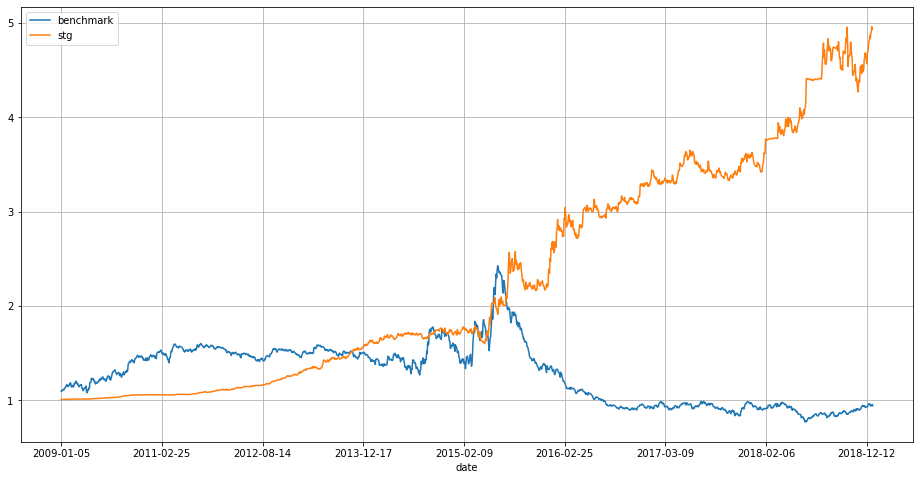

In [407]:
(bench.set_index('date')[['benchmark','stg']]).plot(figsize=(16,8),grid=True)
# (bench.set_index('date')[['ret','pct_chg']]).cumsum().plot(figsize=(16,8),grid=True)

In [408]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-05,0.037648,2009-01-05,2.0,0.000351,0.000351,-1.5,0.034115,1.010000,1.100000
1,2009-01-08,-0.022743,2009-01-08,2.0,0.000000,0.000000,-1.5,0.036577,1.010366,1.095828
2,2009-01-13,-0.024385,2009-01-13,2.0,0.000000,0.000000,-1.5,-0.061325,1.009730,1.104895
3,2009-01-14,0.040883,2009-01-14,2.0,0.000000,0.000000,-1.5,-0.010839,1.009625,1.108917
4,2009-01-19,0.007226,2009-01-19,2.0,0.000000,0.000000,-1.5,0.002139,1.009645,1.117781
...,...,...,...,...,...,...,...,...,...,...
1608,2018-12-24,0.005969,2018-12-24,1.0,0.000000,0.000000,-1.5,0.013063,4.883600,0.938983
1609,2018-12-25,-0.008709,2018-12-25,1.0,0.000000,0.000000,-1.5,0.005980,4.906826,0.947323
1610,2018-12-26,-0.003987,2018-12-26,1.0,-0.000702,-0.000702,-1.5,0.013534,4.959703,0.954151
1611,2018-12-27,-0.009023,2018-12-27,1.0,0.000000,0.000000,-1.5,-0.006285,4.934816,0.956702


<AxesSubplot:xlabel='date'>

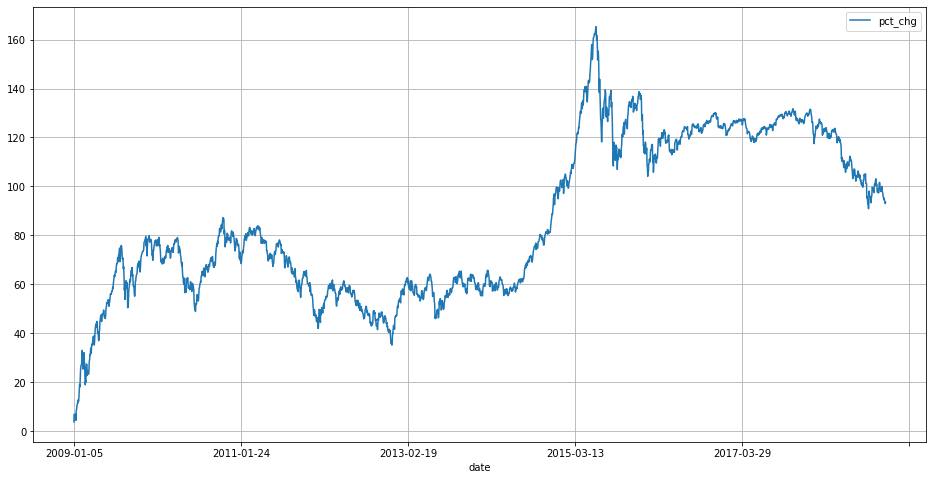

In [409]:
(b.set_index('date')[['pct_chg']]).cumsum().plot(figsize=(16,8),grid=True)

# 策略评价

## 年化收益率

In [410]:
bench['ret'].mean() * 252

1.0064364900744418

In [411]:
bench['benchmark'] = bench['pct_chg']

In [412]:
#大盘同期收益表现
bench['benchmark'].mean() * 252

-0.8315217284562948

## 年化波动率 

In [413]:
bench['ret'].std() * 252 ** 0.5

0.36481948439780315

In [414]:
bench['benchmark'].std() * 252 ** 0.5

0.2587017710119768

## 计算策略的夏普比率

In [415]:
#技术指标策略
(bench['ret'].mean() * 252 - 0.02) / (bench['ret'].std() * 252 ** 0.5)

2.7039029773936654

## 计算策略的信息比率

In [416]:
(bench['ret'].mean() * 252) / (bench['ret'].std() * 252 ** 0.5)

2.7587246107091485

## 计算最大回撤

In [417]:
def MaxDrawdown(return_list):
    '''最大回撤率'''
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    return (return_list[j] - return_list[i]) / (return_list[j])

In [418]:
MaxDrawdown(bench['ret'])

2.6765634611441462

# 胜率

In [419]:
len(bench[bench.ret>=0])/len(bench)

0.5344079355238686

In [420]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-05,0.037648,2009-01-05,2.0,0.000351,0.000351,-1.5,0.034115,1.010000,0.037648
1,2009-01-08,-0.022743,2009-01-08,2.0,0.000000,0.000000,-1.5,0.036577,1.010366,-0.022743
2,2009-01-13,-0.024385,2009-01-13,2.0,0.000000,0.000000,-1.5,-0.061325,1.009730,-0.024385
3,2009-01-14,0.040883,2009-01-14,2.0,0.000000,0.000000,-1.5,-0.010839,1.009625,0.040883
4,2009-01-19,0.007226,2009-01-19,2.0,0.000000,0.000000,-1.5,0.002139,1.009645,0.007226
...,...,...,...,...,...,...,...,...,...,...
1608,2018-12-24,0.005969,2018-12-24,1.0,0.000000,0.000000,-1.5,0.013063,4.883600,0.005969
1609,2018-12-25,-0.008709,2018-12-25,1.0,0.000000,0.000000,-1.5,0.005980,4.906826,-0.008709
1610,2018-12-26,-0.003987,2018-12-26,1.0,-0.000702,-0.000702,-1.5,0.013534,4.959703,-0.003987
1611,2018-12-27,-0.009023,2018-12-27,1.0,0.000000,0.000000,-1.5,-0.006285,4.934816,-0.009023


In [421]:
datas = bench.set_index('date')[['stg','benchmark']]

In [422]:
# 定义函数求各项回测指标
def ratio(datas):
    res = []
    for item in datas:
        data = datas[item]
        
        # 累积收益率        
        strategy_cum = (data + 1).cumprod()
        # 年化收益率
        return_year = data.mean() * 252
        # 每日收益率      
        return_avg = data.mean() 
        # 年化波动率
        volatility = data.std() * 252 ** 0.5
        # 最大每日收益
        profit_max = data.max()
        # 最大每日损失
        loss_max = data.min()
        # 信息比率               
        ir = return_year / volatility
        # 上涨天数
        num_of_up = data[data > 0].count()
        # 下跌天数
        num_of_down = data[data < 0].count()
        # 胜率
        win_rate = float(num_of_up) / (num_of_up + num_of_down)
        # 上涨时平均每日收益率
        gain_of_up = data[data > 0].mean()
        # 下跌时平均每日收益率        
        loss_of_down = data[data < 0].mean()
        # 盈亏比
        profit_loss_ratio = -(gain_of_up / loss_of_down)
        # 最大回撤
        drawdown = ((strategy_cum.cummax() - strategy_cum)/strategy_cum.cummax()).max()
        
        # 创建一个临时的DataFrame
        tmp = pd.DataFrame([ir, float((strategy_cum).tail(1)), return_year, return_avg, volatility, profit_max, loss_max,  
                            num_of_up, num_of_down, win_rate, gain_of_up, loss_of_down, profit_loss_ratio, drawdown], 
                           columns=[data.name], 
                           index=['Information Ratio', 'Cumulative Return', 'Annualised Return', 'Average return', 'Annualised Volatility', 'Maximum Daily Profit', 
                                  'Maximum Daily Loss', 'Number of Up Periods', 'Number of Down Periods', 'Win Rate', 'Avg Gain in Up Periods', 
                                  'Avg Loss in Down Periods', 'Profit and Loss Ratio', 'Maximum Drawdown'])
        res.append(tmp)
    # 返回拼接好的DataFrame
    return pd.concat(res,axis=1,join='inner')

In [278]:
ratio(datas)

,stg,benchmark
Information Ratio,65.517842,0.383595
Cumulative Return,NaN,1.867149
Annualised Return,272.905133,0.096833
Average return,1.082957,0.000384
Annualised Volatility,4.165356,0.252435
Maximum Daily Profit,2.713637,0.064453
Maximum Daily Loss,0.630570,-0.081876
Number of Up Periods,2430.000000,1310.000000
Number of Down Periods,0.000000,1121.000000
Win Rate,1.000000,0.538873


In [287]:
cd \factor

[WinError 2] 系统找不到指定的文件。: '\\factor'
C:\Users\thinkpad\Desktop\因子库


In [289]:
bench.to_csv('hs300_ret.csv')

In [282]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-05,0.037648,2009-01-05,2.0,0.000351,0.000351,1.5,0.048036,1.000000,0.037648
1,2009-01-06,0.032024,-0.5,-0.5,-0.500000,-0.500000,-0.3,0.000727,1.000727,0.032024
2,2009-01-07,-0.002423,-0.5,-0.5,-0.500000,-0.500000,-0.3,0.006823,1.007555,-0.002423
3,2009-01-08,-0.022743,2009-01-08,2.0,0.000000,0.000000,1.5,0.029575,1.037354,-0.022743
4,2009-01-09,0.019717,-0.5,-0.5,-0.500000,-0.500000,-0.3,-0.001462,1.035837,0.019717
...,...,...,...,...,...,...,...,...,...,...
2426,2018-12-24,0.005969,2018-12-24,1.0,0.000000,0.000000,1.5,-0.013063,0.650134,0.005969
2427,2018-12-25,-0.008709,2018-12-25,1.0,0.000000,0.000000,1.5,-0.005980,0.646245,-0.008709
2428,2018-12-26,-0.003987,2018-12-26,1.0,-0.000702,-0.000702,1.5,-0.013534,0.637499,-0.003987
2429,2018-12-27,-0.009023,2018-12-27,1.0,0.000000,0.000000,1.5,0.006285,0.641505,-0.009023
